<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** MINERAÇÃO E ANÁLISE DE DADOS [TURMA 01D] - 2023/1 - Trilha 2.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/MA_T2_A.ipynb<br>
***

## Atividade - Trilha 2 - Parte A - Regressão com "statsmodels"

#### CASO: Estimando o Preço de Imóveis em São Paulo.

A partir deste notebook crie um modelo de regressão múltipla com a biblioteca "statsmodels" para predição de preço de imóveis com base no histórico de preços e características de vários imóveis de São Paulo.

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**.

### Passos:

#### Importando as bibliotecas básicas.

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### Exploração dos dados.

In [160]:
df = pd.read_excel('../data/regressao_preco_imoveis.xlsx')
display(df.head())
display(df.shape)


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


(3741, 7)

(Moodle) **Q1**. Quantos bairros existem no histórico e qual o bairro mais presente nos dados?

In [161]:
# (Moodle) **Q1**. Quantos bairros existem no histórico e qual o bairro mais presente nos dados?
display(df.groupby(['bairro']).size().reset_index(name='contagem').sort_values(by='contagem', ascending=False))

,bairro,contagem
2,vila-mariana,1714
1,paraiso,802
3,vila-nova-conceicao,789
4,vila-sonia,307
0,morumbi,129


#### Preparação dos dados.

Use [statsmodels.formula.api](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html)

Se você empregar esta forma do "statsmodels", ``` from statsmodels.formula.api import ols ```, ele fará de modo implítico o "hot encode" dos dados e não há necessidade de nenhuma transformação dos dados (Não faremos a normalização aqui. Embora sempre recomendável na maior parte dos casos, aqui o resultado de predição será o mesmo com ou sem a normalização).

Atenção, se você empregar ``` from statsmodels.api import OLS ``` os resultados serão os mesmos, mas alguma preparação nos dados será necessária e a construção do modelo será um pouco diferente.

#### Estimando o modelo com o ``` statsmodels ```.

Estime o modelo.

In [162]:
from statsmodels.formula.api import ols  

# model
model1 = ols(formula='preco ~ bairro + areaM2 + suites + dormitorios + banheiros + vagas', data=df)

# fitting model
result1 = model1.fit()

# summary
display(result1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1611.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:12:52   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3731   BIC:                         1.087e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -3.16e+05   5.35e+04     -5.911      0.000   -4.21e+05   -2.11e+05
bairro[T.paraiso]              8.331e+04   4.68e+04      1.781      0.075   -8410.743    1.75e+05
bairro[T.vila-mariana]         -1.18e+05   4.44e+04     -2.657      0.008   -2.05e+05   -3.09e+04
bairro[T.vila-nova-conceicao]  7.698e+05   4.66e+04     16.502      0.000    6.78e+05    8.61e+05
bairro[T.vila-sonia]          -5.245e+05   5.13e+04    -10.234      0.000   -6.25e+05   -4.24e+05
areaM2                         7580.2937    241.143     31.435      0.000    7107.508    8053.079
suites                         1.532e+05   1.33e+04     11.524      0.000    1.27e+05    1.79e+05
dormitorios                   -9.971e+04    1.5e+04     -6.655      0.000   -1.29e+05   -7.03e+04
banheiros                      4755.9925   8373.499      0.568      0.570   -1.17e+04    2.12e+04
vagas                          3.331e+05   1.36e+04     24.503      0.000    3.06e+05     3.6e+05
==============================================================================
Omnibus:                     1315.549   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12370.154
Skew:                           1.401   Prob(JB):                         0.00
Kurtosis:                      11.457   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(Moodle) **Q2**. Qual o coeficiente de determinação ajustado obtido?

Dica: empregue ``` result.rsquared_adj ``` no lugar de ``` result.summary() ``` para obter resultados com maior precisão.

In [163]:
display(f'Adj. R-squared: {result1.rsquared_adj}.')

'Adj. R-squared: 0.7948154407290992.'

(Moodle) **Q3**. Qual coeficiente estimado é menos significativo?

In [164]:
# pvalues
display((result1.pvalues).round(3))

Intercept                        0.000
bairro[T.paraiso]                0.075
bairro[T.vila-mariana]           0.008
bairro[T.vila-nova-conceicao]    0.000
bairro[T.vila-sonia]             0.000
areaM2                           0.000
suites                           0.000
dormitorios                      0.000
banheiros                        0.570
vagas                            0.000
dtype: float64

#### Re-estimando o modelo com o ``` statsmodels ```.

Estime novamente o modelo excluindo o atributo menos significativo (um único atributo).

(Moodle) **Q4**. Qual o novo coeficiente de determinação ajustado obtido?

Excluído o atributo "banheiros" do modelo inicial, pois este era o menos significativo. Obtivemos um novo modelo com coeficiente de determinação ajustado de 0.7948526838722687, um pouco maior do que o coeficiente do modelo anterior que era de 0.7948154407290992.

In [165]:
# model reestimated
model2 = ols(formula='preco ~ bairro + areaM2 + suites + dormitorios + vagas', data=df)

# fitting model
result2 = model2.fit()

# rsquared_adj
display(f'Adj. R-squared: {result2.rsquared_adj}.')

# summary
display(result2.summary())

# pvalues
display((result2.pvalues).round(3))

'Adj. R-squared: 0.7948526838722687.'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1812.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:12:52   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3732   BIC:                         1.087e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -3.14e+05   5.33e+04     -5.887      0.000   -4.19e+05   -2.09e+05
bairro[T.paraiso]              8.287e+04   4.68e+04      1.772      0.076   -8824.930    1.75e+05
bairro[T.vila-mariana]        -1.181e+05   4.44e+04     -2.659      0.008   -2.05e+05    -3.1e+04
bairro[T.vila-nova-conceicao]  7.689e+05   4.66e+04     16.494      0.000    6.78e+05     8.6e+05
bairro[T.vila-sonia]          -5.246e+05   5.12e+04    -10.237      0.000   -6.25e+05   -4.24e+05
areaM2                         7591.9890    240.241     31.602      0.000    7120.973    8063.005
suites                         1.561e+05   1.23e+04     12.700      0.000    1.32e+05     1.8e+05
dormitorios                   -9.795e+04   1.47e+04     -6.683      0.000   -1.27e+05   -6.92e+04
vagas                          3.337e+05   1.35e+04     24.631      0.000    3.07e+05     3.6e+05
==============================================================================
Omnibus:                     1314.663   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12354.953
Skew:                           1.400   Prob(JB):                         0.00
Kurtosis:                      11.451   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept                        0.000
bairro[T.paraiso]                0.076
bairro[T.vila-mariana]           0.008
bairro[T.vila-nova-conceicao]    0.000
bairro[T.vila-sonia]             0.000
areaM2                           0.000
suites                           0.000
dormitorios                      0.000
vagas                            0.000
dtype: float64

#### Predição.

Faça a predição do preço, com o melhor dos modelos obtidos acima, de um imóvel na Vila Mariana, com 134 m2, 1 suíte, 4 dormitórios, 3 banheiros e 3 vagas.

(Moodle) **Q5**. Qual o preço estimado, para o melhor dos modelos obtidos, de um imóvel na Vila Mariana, com 134 m2, 1 suíte, 4 dormitórios, 3 banheiros e 3 vagas?

In [166]:
# values to predict
x = pd.DataFrame({'bairro': df['bairro'],
                  'areaM2': df['areaM2'],
                  'suites': df['suites'],
                  'dormitorios': df['dormitorios'],
                  'banheiros': df['banheiros'],
                  'vagas': df['vagas']})

predict_values = (result2.predict(x)).round(2).astype(int)

x1 = pd.DataFrame({'bairro': ['vila-mariana'],
                  'areaM2': [134],
                  'suites': [1],
                  'dormitorios': [4],
                  'banheiros': [3],
                  'vagas': [3]})

predict_value = (result2.predict(x1)).round(2).astype(int)

# predict x1
display(predict_value)

0    1350584
dtype: int64

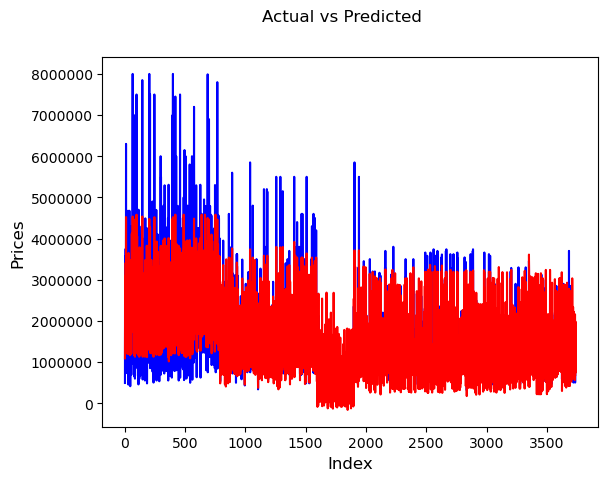

In [167]:
# Actual vs Predicted graph
c = [i for i in range(1,3742,1)]
fig = plt.figure()
plt.plot(c, df.preco, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c, predict_values, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=12)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain')

Exemplo de registro real no dataframe com valores semelhantes ao que foi predito acima pelo modelo.

In [168]:
# record example in dataframe for comparation with the model predict
df[(df.bairro == 'vila-mariana') &
   (df.areaM2 == 132) &
   (df.suites == 1) &
   (df.dormitorios == 4) &
   (df.banheiros == 4) &
   (df.vagas == 3)]

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
2391,vila-mariana,132,1,4,4,3,1280000
